In [24]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Tensors: It is a number,vector,matrix or any n-dim array

In [25]:
t1 = torch.tensor(4.)
t1

tensor(4.)

# 4. is a shorthand for 4.0. It is used to indicate to Python (and PyTorch) that you want to create a floating point number. We can verify this by checking the dtype attribute of our tensor:

In [26]:
t1.dtype

torch.float32

In [27]:
t2 = torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

In [28]:
#Matrix
t3 = torch.tensor([[5,6],[7,8],[6,3]])
t3

tensor([[5, 6],
        [7, 8],
        [6, 3]])

In [29]:
t4 = torch.tensor([[[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
print(t4)
print(t4.shape)

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])
torch.Size([2, 2, 3])


# Tensor Operations 

In [30]:
x = torch.tensor(5.)
w = torch.tensor(4.,requires_grad=True)
b = torch.tensor(5.,requires_grad=True)
x,w,b

(tensor(5.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [31]:
y = w*x + b
y

tensor(25., grad_fn=<AddBackward0>)

In [32]:
y.backward() #Derivative 

In [33]:
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)
#Note that x.grad is None, because x doesn't have requires_grad set to True.

dy/dx: None
dy/dw: tensor(5.)
dy/db: tensor(1.)


# Tensor Functions

In [34]:
t6 = torch.full((3,2),1)
t6

tensor([[1, 1],
        [1, 1],
        [1, 1]])

In [35]:
t7 = torch.concat((t3,t6))
t7

tensor([[5, 6],
        [7, 8],
        [6, 3],
        [1, 1],
        [1, 1],
        [1, 1]])

In [36]:
t8 = torch.sigmoid(t7)
print(t8,t8.shape)

tensor([[0.9933, 0.9975],
        [0.9991, 0.9997],
        [0.9975, 0.9526],
        [0.7311, 0.7311],
        [0.7311, 0.7311],
        [0.7311, 0.7311]]) torch.Size([6, 2])


In [37]:
t9 = t8.reshape(2,2,3)
t9

tensor([[[0.9933, 0.9975, 0.9991],
         [0.9997, 0.9975, 0.9526]],

        [[0.7311, 0.7311, 0.7311],
         [0.7311, 0.7311, 0.7311]]])

In [38]:
x = np.array([[1,2],[3,4.]])
x

array([[1., 2.],
       [3., 4.]])

In [39]:
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [40]:
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

In [41]:
p = pd.DataFrame(y)
p

,0,1
0,1.0,2.0
1,3.0,4.0


# Linear Regression
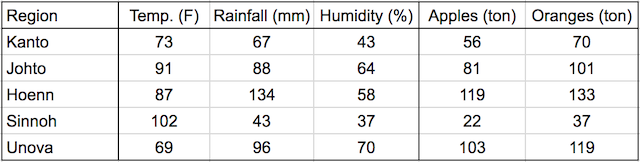

In [42]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

w = torch.randn(2,3,requires_grad = True)
b = torch.randn(2,requires_grad = True)
print(w,b)

tensor([[ 1.2517,  0.2950, -0.0381],
        [ 0.8457, -1.0148, -1.7443]], requires_grad=True) tensor([ 0.1185, -0.5350], requires_grad=True)


Operations: 
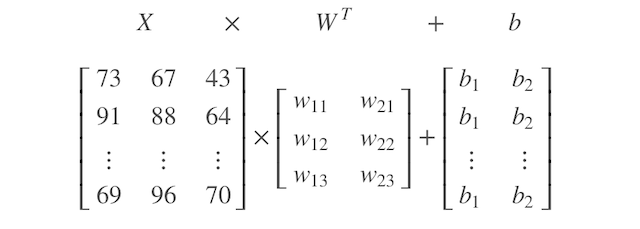

In [43]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [44]:
def model(x):
    return x @ w.t() + b

In [45]:
preds = model(inputs)
preds

tensor([[ 109.6154,  -81.7958],
        [ 137.5394, -124.5142],
        [ 146.3311, -164.1105],
        [ 139.0632,  -22.4512],
        [ 112.1335, -161.7028]], grad_fn=<AddBackward0>)

In [46]:
def mse(actual,predicted):
    diff = abs(actual-predicted)
    return torch.sum(diff*diff)/diff.numel()
#numel(): No of elements in the tensor (avg)

In [47]:
loss = mse(targets,preds)
loss.tolist()

26510.73046875

In [48]:
loss.backward()

In [49]:
print(w,w.grad)


tensor([[ 1.2517,  0.2950, -0.0381],
        [ 0.8457, -1.0148, -1.7443]], requires_grad=True) tensor([[  4801.4941,   3628.1204,   2495.9744],
        [-16576.8027, -19866.4492, -12008.2861]])


In [50]:
print(b,b.grad)

tensor([ 0.1185, -0.5350], requires_grad=True) tensor([  52.7365, -202.9149])


In [51]:
l = []
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    a = int(loss)
    l.append(a)
    print(loss)
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
        

tensor(26510.7305, grad_fn=<DivBackward0>)
tensor(12443.2764, grad_fn=<DivBackward0>)
tensor(9213.4229, grad_fn=<DivBackward0>)
tensor(7027.1860, grad_fn=<DivBackward0>)
tensor(5544.3462, grad_fn=<DivBackward0>)
tensor(4535.6353, grad_fn=<DivBackward0>)
tensor(3846.5515, grad_fn=<DivBackward0>)
tensor(3372.9761, grad_fn=<DivBackward0>)
tensor(3044.7429, grad_fn=<DivBackward0>)
tensor(2814.5684, grad_fn=<DivBackward0>)
tensor(2650.5847, grad_fn=<DivBackward0>)
tensor(2531.3176, grad_fn=<DivBackward0>)
tensor(2442.2937, grad_fn=<DivBackward0>)
tensor(2373.7583, grad_fn=<DivBackward0>)
tensor(2319.1355, grad_fn=<DivBackward0>)
tensor(2273.9934, grad_fn=<DivBackward0>)
tensor(2235.3445, grad_fn=<DivBackward0>)
tensor(2201.1733, grad_fn=<DivBackward0>)
tensor(2170.1218, grad_fn=<DivBackward0>)
tensor(2141.2710, grad_fn=<DivBackward0>)
tensor(2114.0037, grad_fn=<DivBackward0>)
tensor(2087.8992, grad_fn=<DivBackward0>)
tensor(2062.6758, grad_fn=<DivBackward0>)
tensor(2038.1404, grad_fn=<DivBa

<AxesSubplot: >

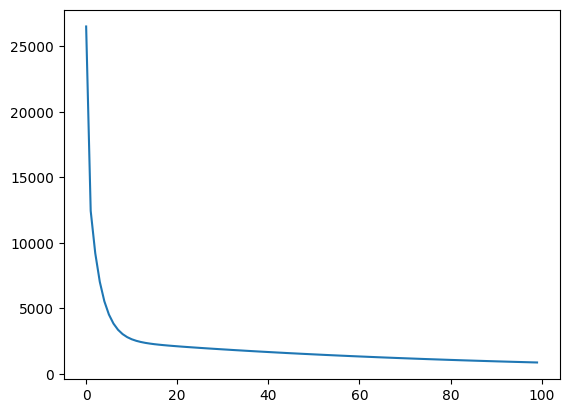

In [52]:
import seaborn as sns
sns.lineplot(l)

In [53]:
inputs.shape

torch.Size([5, 3])

# DATALOADER

In [54]:
from torch.utils.data import TensorDataset,DataLoader

In [55]:
x = inputs
y = targets

In [56]:
print(x,y)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]]) tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [57]:
train_data = TensorDataset(x,y)
print(train_data[0:3])

(tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.]]))


In [58]:
print(train_data[0])

(tensor([73., 67., 43.]), tensor([56., 70.]))


In [59]:
print(train_data[0][1])

tensor([56., 70.])


In [60]:
batch_size = 5
train_dataload = DataLoader(train_data,batch_size,shuffle=True)

In [61]:
for x,y in train_dataload:
    print(x)
    print(y)

tensor([[ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [ 73.,  67.,  43.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.]])
tensor([[ 81., 101.],
        [119., 133.],
        [ 56.,  70.],
        [103., 119.],
        [ 22.,  37.]])


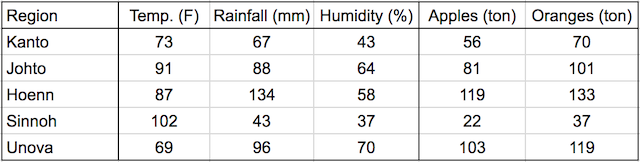

In [62]:
import torch.nn as nn

In [63]:
model = nn.Linear(3,2)
#nn.linear: 3 = {temp,rainfall,hum} => No of features 
# 2 = {Apples,Oranges} => No of output 
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4108,  0.0707, -0.5221],
        [ 0.1400, -0.5754,  0.3897]], requires_grad=True)
Parameter containing:
tensor([-0.5365,  0.5186], requires_grad=True)


In [64]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4108,  0.0707, -0.5221],
         [ 0.1400, -0.5754,  0.3897]], requires_grad=True),
 Parameter containing:
 tensor([-0.5365,  0.5186], requires_grad=True)]

In [65]:
preds = model(x)
preds

tensor([[  9.6624, -12.4383],
        [ 14.4058, -41.8028],
        [ 11.7452, -11.0579],
        [ -1.9422, -17.7825],
        [ 25.0936,   4.4720]], grad_fn=<AddmmBackward0>)

In [66]:
import torch.nn.functional as F 
loss_fn = F.mse_loss

In [67]:
loss = loss_fn(model(x),y)
loss

tensor(9877.2090, grad_fn=<MseLossBackward0>)

In [68]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)

In [69]:
def LR(epochs, model, loss_fn, optimizer,train_dataload):
    loss_list = []
    for i in range(epochs):
        for x,y in train_dataload:
            ypred = model(x)
            loss = loss_fn(ypred,y)
            loss_list.append((loss))
            print((loss))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    return model
model = LR(500, model, loss_fn, optimizer,train_dataload)

tensor(9877.2090, grad_fn=<MseLossBackward0>)
tensor(6441.3350, grad_fn=<MseLossBackward0>)
tensor(4261.4604, grad_fn=<MseLossBackward0>)
tensor(2871.0354, grad_fn=<MseLossBackward0>)
tensor(1977.7299, grad_fn=<MseLossBackward0>)
tensor(1398.2667, grad_fn=<MseLossBackward0>)
tensor(1017.6404, grad_fn=<MseLossBackward0>)
tensor(763.5982, grad_fn=<MseLossBackward0>)
tensor(590.6703, grad_fn=<MseLossBackward0>)
tensor(470.1759, grad_fn=<MseLossBackward0>)
tensor(383.9653, grad_fn=<MseLossBackward0>)
tensor(320.5034, grad_fn=<MseLossBackward0>)
tensor(272.4146, grad_fn=<MseLossBackward0>)
tensor(234.9451, grad_fn=<MseLossBackward0>)
tensor(204.9987, grad_fn=<MseLossBackward0>)
tensor(180.5312, grad_fn=<MseLossBackward0>)
tensor(160.1691, grad_fn=<MseLossBackward0>)
tensor(142.9706, grad_fn=<MseLossBackward0>)
tensor(128.2741, grad_fn=<MseLossBackward0>)
tensor(115.6019, grad_fn=<MseLossBackward0>)
tensor(104.5993, grad_fn=<MseLossBackward0>)
tensor(94.9953, grad_fn=<MseLossBackward0>)
tens

tensor(1.5205, grad_fn=<MseLossBackward0>)
tensor(1.5019, grad_fn=<MseLossBackward0>)
tensor(1.4837, grad_fn=<MseLossBackward0>)
tensor(1.4657, grad_fn=<MseLossBackward0>)
tensor(1.4481, grad_fn=<MseLossBackward0>)
tensor(1.4309, grad_fn=<MseLossBackward0>)
tensor(1.4139, grad_fn=<MseLossBackward0>)
tensor(1.3973, grad_fn=<MseLossBackward0>)
tensor(1.3810, grad_fn=<MseLossBackward0>)
tensor(1.3649, grad_fn=<MseLossBackward0>)
tensor(1.3492, grad_fn=<MseLossBackward0>)
tensor(1.3338, grad_fn=<MseLossBackward0>)
tensor(1.3186, grad_fn=<MseLossBackward0>)
tensor(1.3038, grad_fn=<MseLossBackward0>)
tensor(1.2892, grad_fn=<MseLossBackward0>)
tensor(1.2749, grad_fn=<MseLossBackward0>)
tensor(1.2608, grad_fn=<MseLossBackward0>)
tensor(1.2470, grad_fn=<MseLossBackward0>)
tensor(1.2335, grad_fn=<MseLossBackward0>)
tensor(1.2202, grad_fn=<MseLossBackward0>)
tensor(1.2072, grad_fn=<MseLossBackward0>)
tensor(1.1944, grad_fn=<MseLossBackward0>)
tensor(1.1818, grad_fn=<MseLossBackward0>)
tensor(1.16

tensor(0.5410, grad_fn=<MseLossBackward0>)
tensor(0.5406, grad_fn=<MseLossBackward0>)
tensor(0.5402, grad_fn=<MseLossBackward0>)
tensor(0.5398, grad_fn=<MseLossBackward0>)
tensor(0.5394, grad_fn=<MseLossBackward0>)
tensor(0.5390, grad_fn=<MseLossBackward0>)
tensor(0.5386, grad_fn=<MseLossBackward0>)
tensor(0.5383, grad_fn=<MseLossBackward0>)
tensor(0.5379, grad_fn=<MseLossBackward0>)
tensor(0.5375, grad_fn=<MseLossBackward0>)
tensor(0.5372, grad_fn=<MseLossBackward0>)
tensor(0.5369, grad_fn=<MseLossBackward0>)
tensor(0.5365, grad_fn=<MseLossBackward0>)
tensor(0.5362, grad_fn=<MseLossBackward0>)
tensor(0.5359, grad_fn=<MseLossBackward0>)
tensor(0.5355, grad_fn=<MseLossBackward0>)
tensor(0.5352, grad_fn=<MseLossBackward0>)
tensor(0.5349, grad_fn=<MseLossBackward0>)
tensor(0.5346, grad_fn=<MseLossBackward0>)
tensor(0.5343, grad_fn=<MseLossBackward0>)
tensor(0.5340, grad_fn=<MseLossBackward0>)
tensor(0.5338, grad_fn=<MseLossBackward0>)
tensor(0.5335, grad_fn=<MseLossBackward0>)
tensor(0.53

In [70]:
model = LR(500, model, loss_fn, optimizer,train_dataload)

tensor(0.5227, grad_fn=<MseLossBackward0>)
tensor(0.5226, grad_fn=<MseLossBackward0>)
tensor(0.5226, grad_fn=<MseLossBackward0>)
tensor(0.5225, grad_fn=<MseLossBackward0>)
tensor(0.5224, grad_fn=<MseLossBackward0>)
tensor(0.5224, grad_fn=<MseLossBackward0>)
tensor(0.5223, grad_fn=<MseLossBackward0>)
tensor(0.5222, grad_fn=<MseLossBackward0>)
tensor(0.5222, grad_fn=<MseLossBackward0>)
tensor(0.5221, grad_fn=<MseLossBackward0>)
tensor(0.5220, grad_fn=<MseLossBackward0>)
tensor(0.5220, grad_fn=<MseLossBackward0>)
tensor(0.5219, grad_fn=<MseLossBackward0>)
tensor(0.5219, grad_fn=<MseLossBackward0>)
tensor(0.5218, grad_fn=<MseLossBackward0>)
tensor(0.5217, grad_fn=<MseLossBackward0>)
tensor(0.5217, grad_fn=<MseLossBackward0>)
tensor(0.5216, grad_fn=<MseLossBackward0>)
tensor(0.5216, grad_fn=<MseLossBackward0>)
tensor(0.5215, grad_fn=<MseLossBackward0>)
tensor(0.5215, grad_fn=<MseLossBackward0>)
tensor(0.5214, grad_fn=<MseLossBackward0>)
tensor(0.5214, grad_fn=<MseLossBackward0>)
tensor(0.52

tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.5187, grad_fn=<MseLossBackward0>)
tensor(0.51

In [71]:
ypred = model(x)
ypred

tensor([[ 82.2629, 100.6162],
        [118.7084, 132.9440],
        [ 57.0754,  70.3954],
        [101.9053, 119.1521],
        [ 21.0930,  37.0043]], grad_fn=<AddmmBackward0>)

In [72]:
y

tensor([[ 81., 101.],
        [119., 133.],
        [ 56.,  70.],
        [103., 119.],
        [ 22.,  37.]])

In [73]:
(1)/(1+np.exp(-101))

1.0

In [96]:
df = pd.read_csv("Salary_Data.csv")
df 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [116]:
x = df.drop('YearsExperience',axis=1)
y = df['YearsExperience']
#cols = x.columns
#for col in cols:
 #   x[col] = (x[col]-min(x[col]))/(max(x[col])-min(x[col]))
#y = (y-min(y))/(max(y)-min(y))

In [117]:
x = np.array(x,dtype='float32')
y = np.array(y,dtype='float32')
x.shape

(30, 1)

In [118]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [119]:
tensor_data = TensorDataset(x,y)
tensor_data[0:3]

(tensor([[39343.],
         [46205.],
         [37731.]]),
 tensor([1.1000, 1.3000, 1.5000]))

In [111]:
train_dataload = DataLoader(tensor_data,shuffle=True)
model = nn.Linear(1,1)
loss_fn = F.mse_loss
optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)

In [112]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7148]], requires_grad=True),
 Parameter containing:
 tensor([-0.6786], requires_grad=True)]

In [113]:
def LR(epochs, model, loss_fn, optimizer,train_dataload):
    loss_list = []
    for i in range(epochs):
        for x,y in train_dataload:
            ypred = model(x)
            loss = loss_fn(y,ypred)
            loss_list.append((loss))
            print((loss))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    return model


In [114]:
model = LR(50, model, loss_fn, optimizer,train_dataload)

C:\Users\shila\AppData\Local\Temp\ipykernel_11484\2884882269.py:6: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(y,ypred)


tensor(5.2426e+09, grad_fn=<MseLossBackward0>)
tensor(3.4244e+21, grad_fn=<MseLossBackward0>)
tensor(8.1402e+32, grad_fn=<MseLossBackward0>)
tensor(inf, grad_fn=<MseLossBackward0>)
tensor(inf, grad_fn=<MseLossBackward0>)
tensor(inf, grad_fn=<MseLossBackward0>)
tensor(inf, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn

tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)


tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)


In [105]:
list(model.parameters())

[Parameter containing:
 tensor([[nan]], requires_grad=True),
 Parameter containing:
 tensor([nan], requires_grad=True)]

In [106]:
ypred = model(x)
ypred

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]], grad_fn=<AddmmBackward0>)

In [85]:
y

tensor([ 1.1000,  1.3000,  1.5000,  2.0000,  2.2000,  2.9000,  3.0000,  3.2000,
         3.2000,  3.7000,  3.9000,  4.0000,  4.0000,  4.1000,  4.5000,  4.9000,
         5.1000,  5.3000,  5.9000,  6.0000,  6.8000,  7.1000,  7.9000,  8.2000,
         8.7000,  9.0000,  9.5000,  9.6000, 10.3000, 10.5000])

In [120]:
input_size = 1
output_size = 1
num_epochs = 6000
learning_rate = 0.1

# Toy dataset
x_train = x

y_train = y
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
   # inputs = torch.from_numpy(x_train)
    #targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph


C:\Users\shila\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [5/6000], Loss: inf
Epoch [10/6000], Loss: nan
Epoch [15/6000], Loss: nan
Epoch [20/6000], Loss: nan
Epoch [25/6000], Loss: nan
Epoch [30/6000], Loss: nan
Epoch [35/6000], Loss: nan
Epoch [40/6000], Loss: nan
Epoch [45/6000], Loss: nan
Epoch [50/6000], Loss: nan
Epoch [55/6000], Loss: nan
Epoch [60/6000], Loss: nan
Epoch [65/6000], Loss: nan
Epoch [70/6000], Loss: nan
Epoch [75/6000], Loss: nan
Epoch [80/6000], Loss: nan
Epoch [85/6000], Loss: nan
Epoch [90/6000], Loss: nan
Epoch [95/6000], Loss: nan
Epoch [100/6000], Loss: nan
Epoch [105/6000], Loss: nan
Epoch [110/6000], Loss: nan
Epoch [115/6000], Loss: nan
Epoch [120/6000], Loss: nan
Epoch [125/6000], Loss: nan
Epoch [130/6000], Loss: nan
Epoch [135/6000], Loss: nan
Epoch [140/6000], Loss: nan
Epoch [145/6000], Loss: nan
Epoch [150/6000], Loss: nan
Epoch [155/6000], Loss: nan
Epoch [160/6000], Loss: nan
Epoch [165/6000], Loss: nan
Epoch [170/6000], Loss: nan
Epoch [175/6000], Loss: nan
Epoch [180/6000], Loss: nan
Epoch [185/6

Epoch [2515/6000], Loss: nan
Epoch [2520/6000], Loss: nan
Epoch [2525/6000], Loss: nan
Epoch [2530/6000], Loss: nan
Epoch [2535/6000], Loss: nan
Epoch [2540/6000], Loss: nan
Epoch [2545/6000], Loss: nan
Epoch [2550/6000], Loss: nan
Epoch [2555/6000], Loss: nan
Epoch [2560/6000], Loss: nan
Epoch [2565/6000], Loss: nan
Epoch [2570/6000], Loss: nan
Epoch [2575/6000], Loss: nan
Epoch [2580/6000], Loss: nan
Epoch [2585/6000], Loss: nan
Epoch [2590/6000], Loss: nan
Epoch [2595/6000], Loss: nan
Epoch [2600/6000], Loss: nan
Epoch [2605/6000], Loss: nan
Epoch [2610/6000], Loss: nan
Epoch [2615/6000], Loss: nan
Epoch [2620/6000], Loss: nan
Epoch [2625/6000], Loss: nan
Epoch [2630/6000], Loss: nan
Epoch [2635/6000], Loss: nan
Epoch [2640/6000], Loss: nan
Epoch [2645/6000], Loss: nan
Epoch [2650/6000], Loss: nan
Epoch [2655/6000], Loss: nan
Epoch [2660/6000], Loss: nan
Epoch [2665/6000], Loss: nan
Epoch [2670/6000], Loss: nan
Epoch [2675/6000], Loss: nan
Epoch [2680/6000], Loss: nan
Epoch [2685/60

Epoch [4975/6000], Loss: nan
Epoch [4980/6000], Loss: nan
Epoch [4985/6000], Loss: nan
Epoch [4990/6000], Loss: nan
Epoch [4995/6000], Loss: nan
Epoch [5000/6000], Loss: nan
Epoch [5005/6000], Loss: nan
Epoch [5010/6000], Loss: nan
Epoch [5015/6000], Loss: nan
Epoch [5020/6000], Loss: nan
Epoch [5025/6000], Loss: nan
Epoch [5030/6000], Loss: nan
Epoch [5035/6000], Loss: nan
Epoch [5040/6000], Loss: nan
Epoch [5045/6000], Loss: nan
Epoch [5050/6000], Loss: nan
Epoch [5055/6000], Loss: nan
Epoch [5060/6000], Loss: nan
Epoch [5065/6000], Loss: nan
Epoch [5070/6000], Loss: nan
Epoch [5075/6000], Loss: nan
Epoch [5080/6000], Loss: nan
Epoch [5085/6000], Loss: nan
Epoch [5090/6000], Loss: nan
Epoch [5095/6000], Loss: nan
Epoch [5100/6000], Loss: nan
Epoch [5105/6000], Loss: nan
Epoch [5110/6000], Loss: nan
Epoch [5115/6000], Loss: nan
Epoch [5120/6000], Loss: nan
Epoch [5125/6000], Loss: nan
Epoch [5130/6000], Loss: nan
Epoch [5135/6000], Loss: nan
Epoch [5140/6000], Loss: nan
Epoch [5145/60

In [ ]:
122460119040.0000 - 122459873280.0000